In [7]:
# convolution's goal is to locate the feature. what kind of function that will condense the feature, is up to you
# first-layer: mostly combination of features
# second-layer: combinations of those features as inputs, and start recognizing things like shape (circle, square, etc)

import cv2
import os
import numpy as np
from tqdm import tqdm

In [5]:
# kaggle cats and dogs dataset
# data is located here:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
!unzip kagglecatsanddogs_3367a.zip

'/Users/josephjung/programming/stuck-with-codes/pytorch'

In [10]:
REBUILD_DATA = True

class DogsCats(object):
    IMG_LENGTH = 50
    CATS = 'catsdogsimages/cat'
    DOGS = 'catsdogsimages/dog'
    LABELS = {CATS: 0, DOGS: 1}
    
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_LENGTH, self.IMG_LENGTH))
                    self.training_data.append(
                        [np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                
                except Exception as e:
                    pass
                        
        np.random.shuffle(self.training_data)
        np.save('training_data.npy', self.training_data)
        print('cats: {}, dogs: {}'.format(self.catcount, self.dogcount))

if REBUILD_DATA:
    dogscats = DogsCats()
    dogscats.make_training_data()

  0%|          | 0/12501 [00:00<?, ?it/s]

catsdogsimages/cat


  0%|          | 0/12501 [00:00<?, ?it/s]

catsdogsimages/dog


100%|██████████| 12501/12501 [00:38<00:00, 326.60it/s]


cats: 12476, dogs: 12470


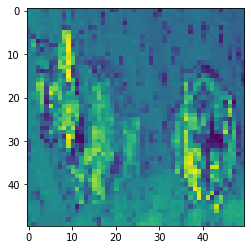

In [38]:
training_data = np.load("training_data.npy", allow_pickle=True)

import matplotlib.pyplot as plt

plt.imshow(training_data[0][0])
plt.show()